<a href="https://colab.research.google.com/github/SudharshanaHG/Python_Diwali_Sales_Analysis-/blob/main/Diwali_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Project Title : Diwali Sales Analysis

##Project Summary:

I have worked on this project in which there is a company that has given me its Diwali period data to perform Exploratory Data Analysis functions on its Diwali sales data.


# Import Libraries for EDA

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Read csv file

In [13]:
data=pd.read_csv("/content/Diwali Sales Data.csv",encoding = "unicode_escape")

#Data Cleaning

In [14]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [16]:
data.shape

(11251, 15)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [25]:
#drop unlelated/blank column
data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [26]:
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [27]:
#drop null values
data.dropna(inplace=True)

In [29]:
#change data type
data['Amount']=data['Amount'].astype('int')

In [30]:
data['Amount'].dtypes

dtype('int64')

In [31]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [33]:
#column rename
data.rename(columns= {'Gender':'Sex'},inplace=True)

In [34]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [35]:
#describe() method returns statistical description of data in the dataframe(i.e. count, min, max, std, mean, etc)
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [36]:
#use describe() for specif columns
data[['Orders','Amount']].describe()

,Orders,Amount
count,11239.000000,11239.000000
mean,2.489634,9453.610553
std,1.114967,5222.355168
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12675.000000
max,4.000000,23952.000000


In [37]:
#The data has been cleaned and all the changes have been made. You can see here.
data

,User_ID,Cust_name,Product_ID,Sex,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


Exploratory Data Analysis - EDA

Sex

Text(0.5, 1.0, 'No.of gender')

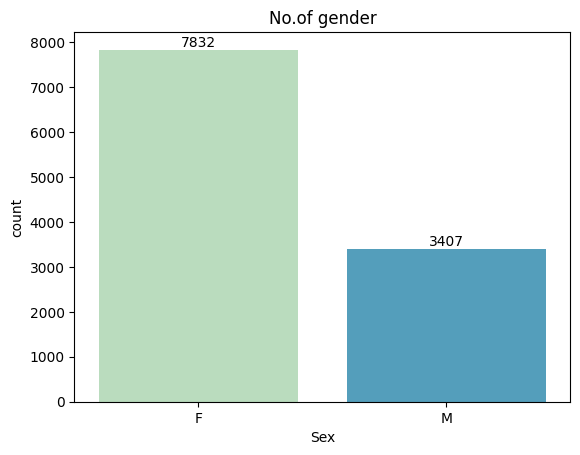

In [42]:
#No of gender

ax=sns.countplot(x='Sex',data=data,palette='GnBu')

for bar in ax.containers:
  ax.bar_label(bar)

plt.title('No.of gender')

Text(0.5, 1.0, 'Total Amount spent by Gender')

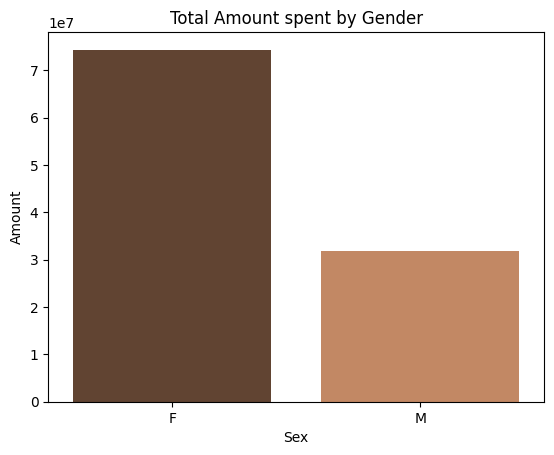

In [45]:
#Total Amount vs Sex

sales_sex=data.groupby(['Sex'],as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Sex', y= 'Amount', data = sales_sex, palette = 'copper')
plt.title('Total Amount spent by Gender')

from above graph we can see that the most of the buyers are Females and even the purchasing power of female's are greater than men.

**Age**

Text(0.5, 1.0, 'No. of Age Groups')

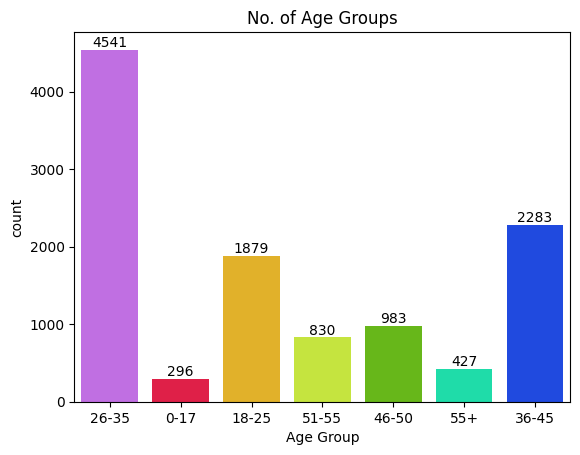

In [46]:
#No. of Age Groups
ax = sns.countplot(x = 'Age Group', data = data, palette = 'gist_ncar_r')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('No. of Age Groups')

Text(0.5, 1.0, 'No. of Buyers vs Age Group & Gender')

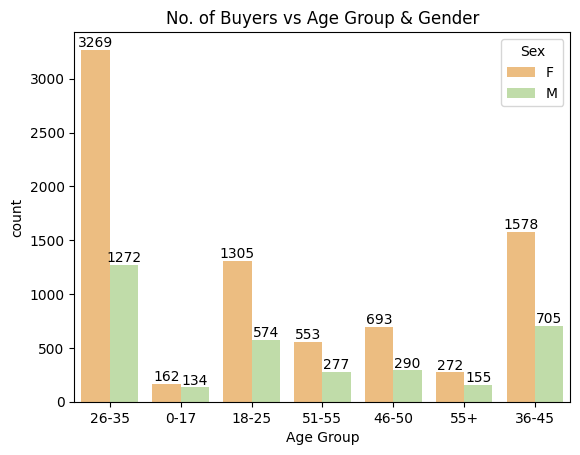

In [48]:
#No. of purchases gender wise according to age group
ax = sns.countplot(x = 'Age Group', hue = 'Sex', data = data, palette = 'Spectral')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('No. of Buyers vs Age Group & Gender')

Text(0.5, 1.0, 'Total Amount spent by Age Group')

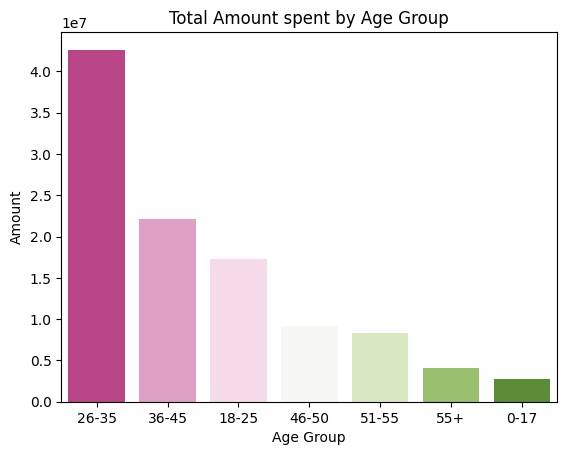

In [49]:
#Total Amount vs Age Group
sales_age = data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y= 'Amount', data = sales_age, palette = 'PiYG')
plt.title('Total Amount spent by Age Group')

from above graphs we can see that most of the buyers are of age group between 26-35 and most of them are Females


**State**

Text(0.5, 1.0, 'No. of Orders from Top 10 States')

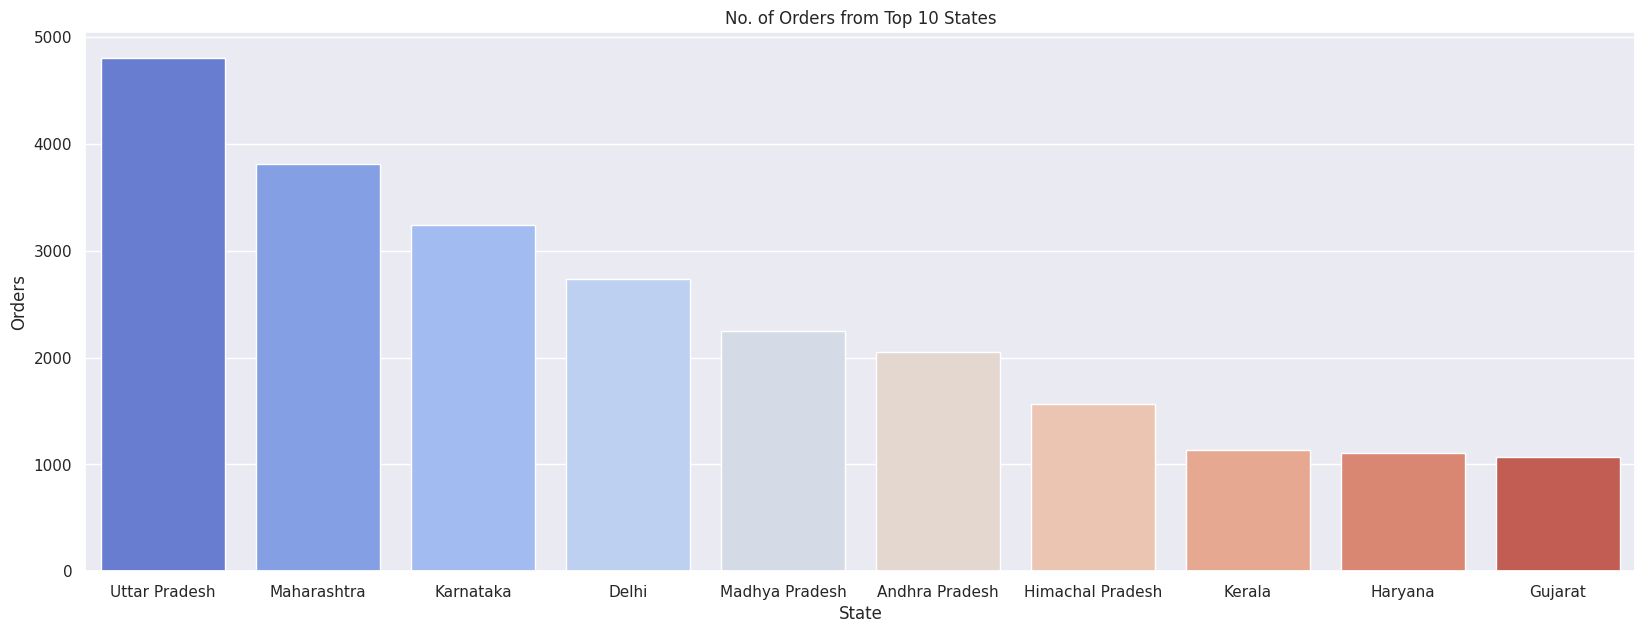

In [50]:
#Total no. of orders from top 10 states
sales_state = data.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x = 'State', y= 'Orders', data = sales_state, palette = 'coolwarm')
plt.title('No. of Orders from Top 10 States')

Text(0.5, 1.0, 'Total Amount spent by Top 10 States')

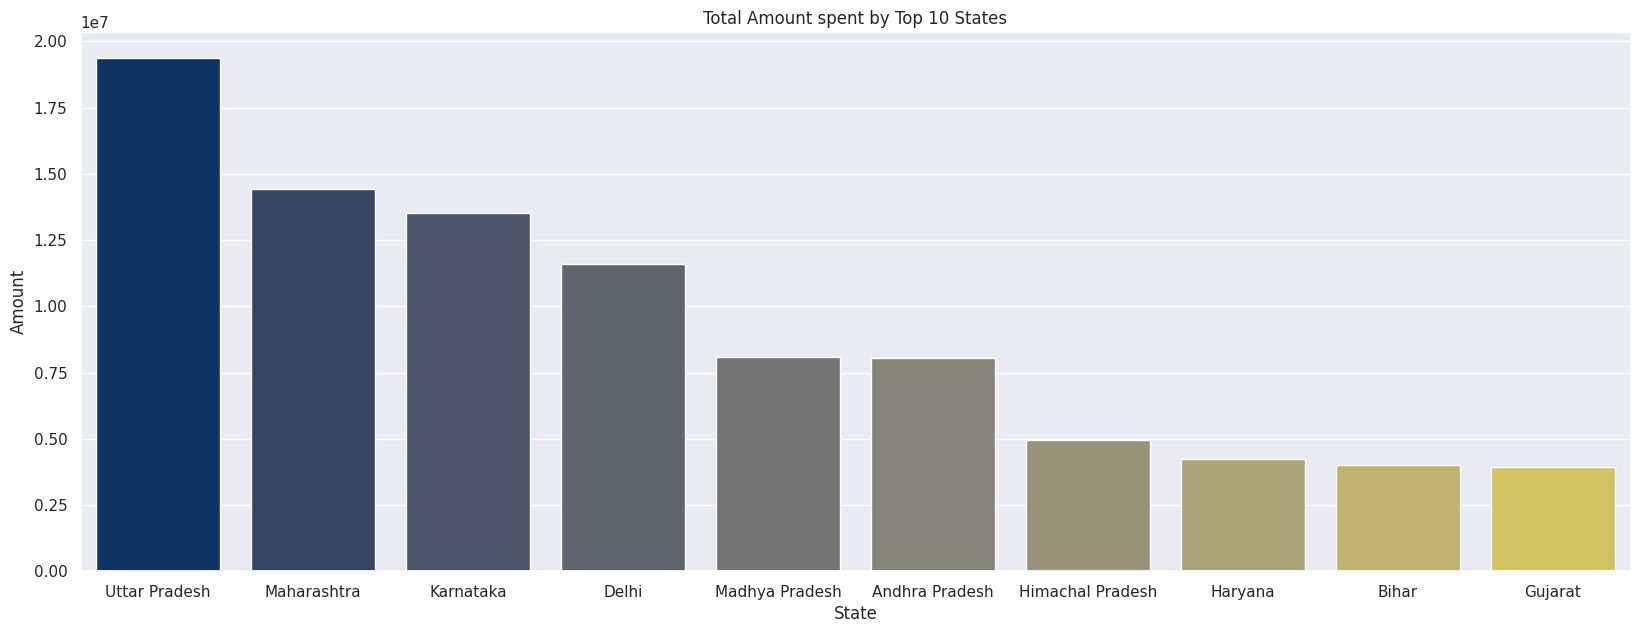

In [51]:
# Total amount of sales from the top 10 states.
sales_state = data.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x = 'State', y= 'Amount', data = sales_state, palette = 'cividis')
plt.title('Total Amount spent by Top 10 States')

From the above graphs, we can see that the no. of orders & the total amount of sales are primarily from Uttar Pradesh, Maharashtra, and Karnataka, respectively.
And if you look carefully at both the graphs, there is a small difference, i.e. Kerala is at number 8 in the total number of orders but in the graph of the total amount Kerala is not there. This shows that Kerala is only in no. of sales and that too in low-average price items and not inexpensive items. The store earn better from Haryana and Bihar instead of Kerala.

**Marital** **Status**

Text(0.5, 1.0, 'No. of Purchases vs Marital Status')

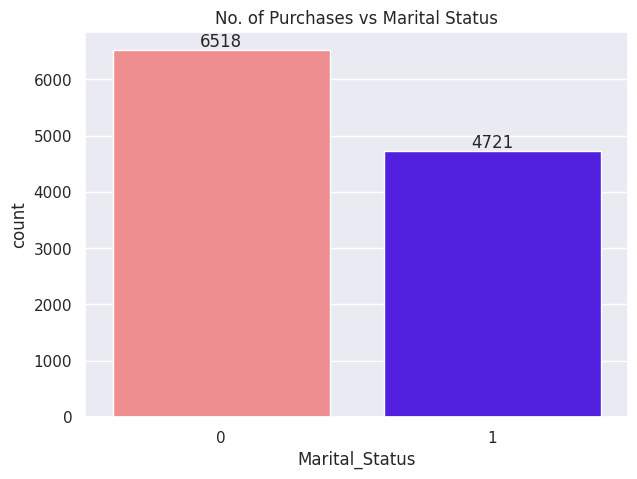

In [55]:
#No. of Purchases according to Marital Status
ax = sns.countplot(x = 'Marital_Status', data = data, palette = 'gnuplot2_r')

sns.set(rc={'figure.figsize':(5,3)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('No. of Purchases vs Marital Status')

Text(0.5, 1.0, 'Total Amount vs Marital Status & Gender')

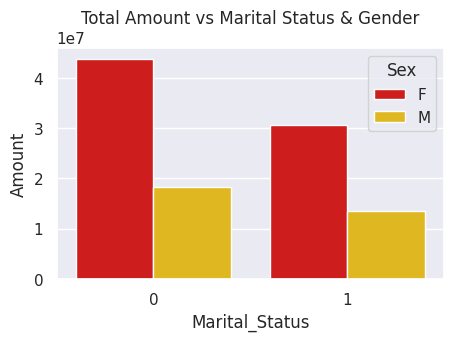

In [56]:
#Total amount of sales according to marital status and sex
sales_ms = data.groupby(['Marital_Status', 'Sex'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Marital_Status', y= 'Amount', data = sales_ms, hue = 'Sex', palette = 'hot')
plt.title('Total Amount vs Marital Status & Gender')

From above graphs we can see that the most of the buyers are married (Women) and they have high purchasing power

**Occupation**

Text(0.5, 1.0, 'No. of Buyers vs Occupation')

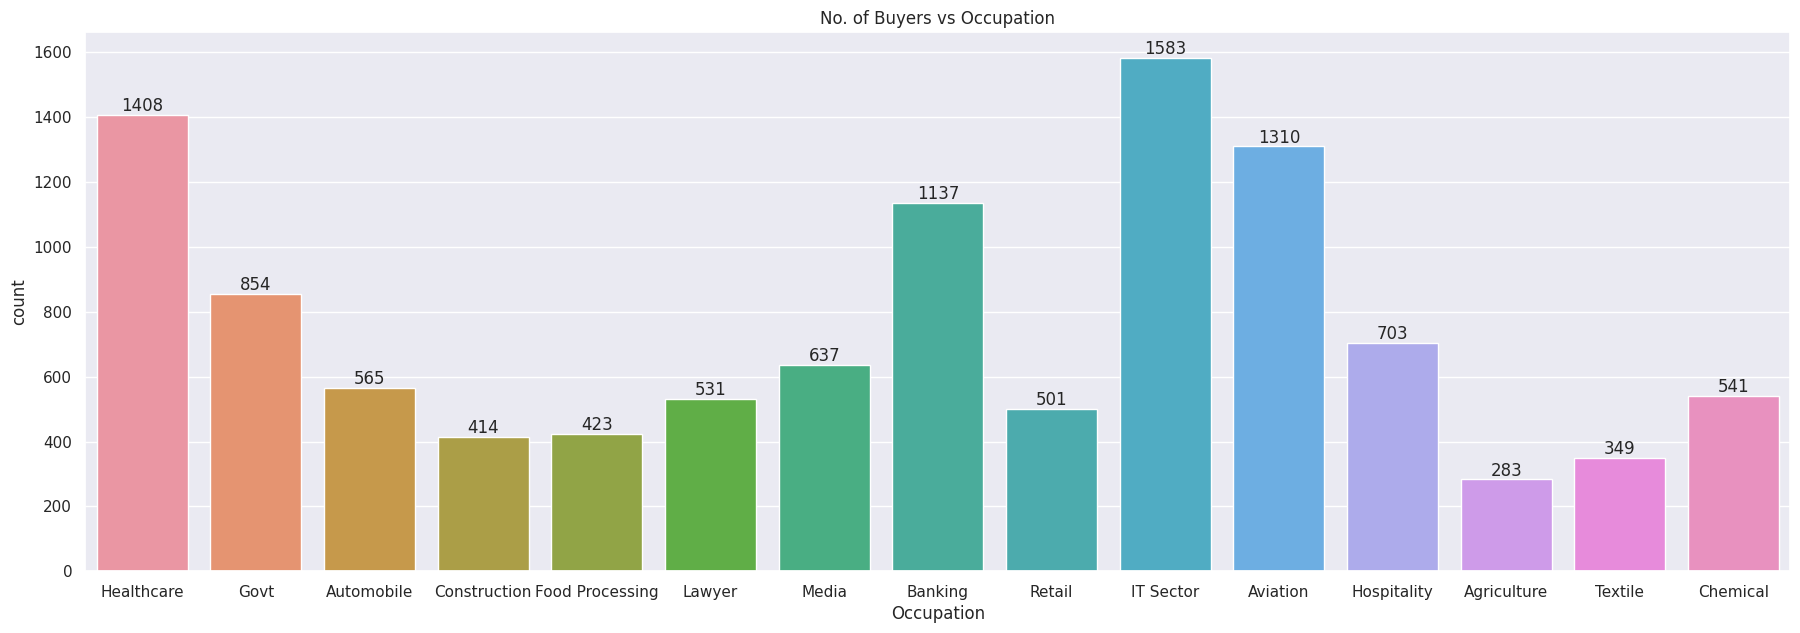

In [61]:
#No. of Purchases according to Occupation
ax = sns.countplot(x = 'Occupation', data = data)

sns.set(rc={'figure.figsize':(22,5)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('No. of Buyers vs Occupation')

Text(0.5, 1.0, 'No. of Total Amount generated by Occupation')

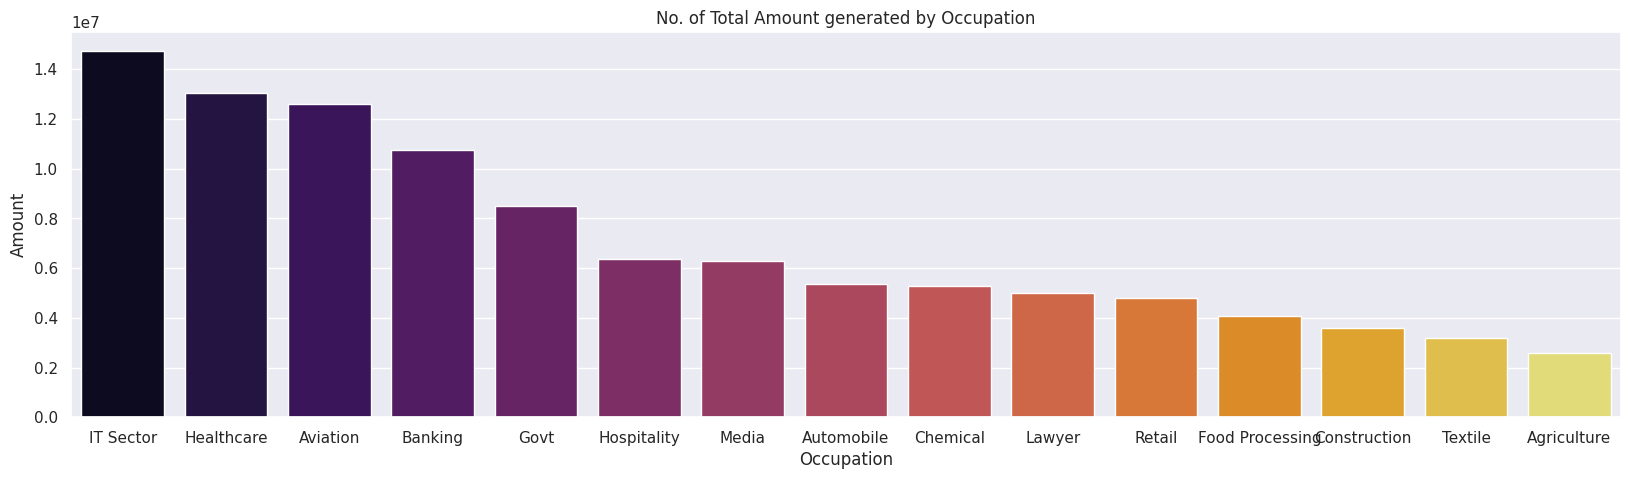

In [73]:
#Total amount of sales according to Occupation
sales_occu = data.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Occupation', y= 'Amount', data = sales_occu, palette = 'inferno')
sns.set(rc={'figure.figsize':(15,5)})
plt.title('No. of Total Amount generated by Occupation')

From above graphs we can see that most of the buyers are working in IT, Healtcare, and Aviation Sector then so on.

**Product Category**

Text(0.5, 1.0, 'No. of sales per Product Category')

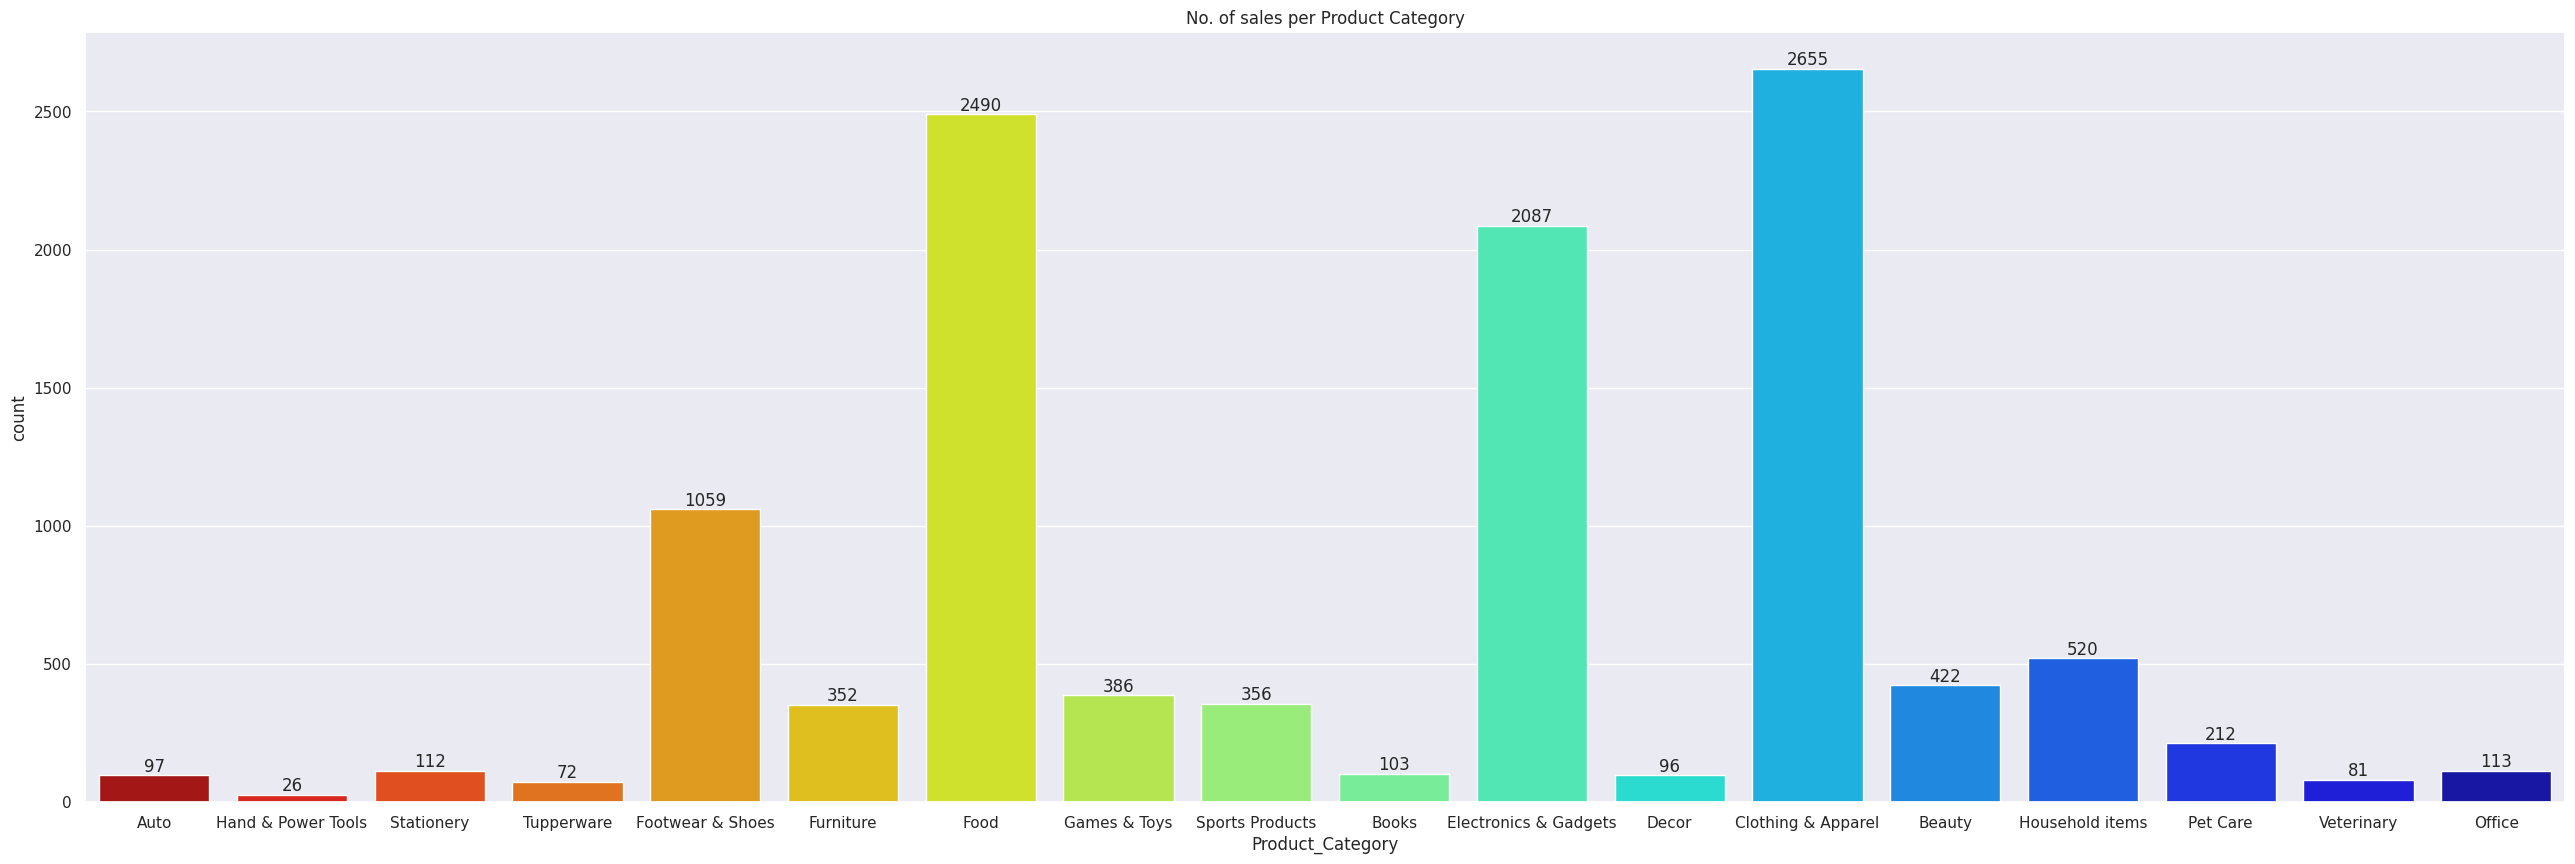

In [75]:
#No. of Sales according to Product Category
ax = sns.countplot(x = 'Product_Category', data = data, palette = 'jet_r')

sns.set(rc={'figure.figsize':(40,10)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('No. of sales per Product Category')

Text(0.5, 1.0, 'Total amount of sales by product categry')

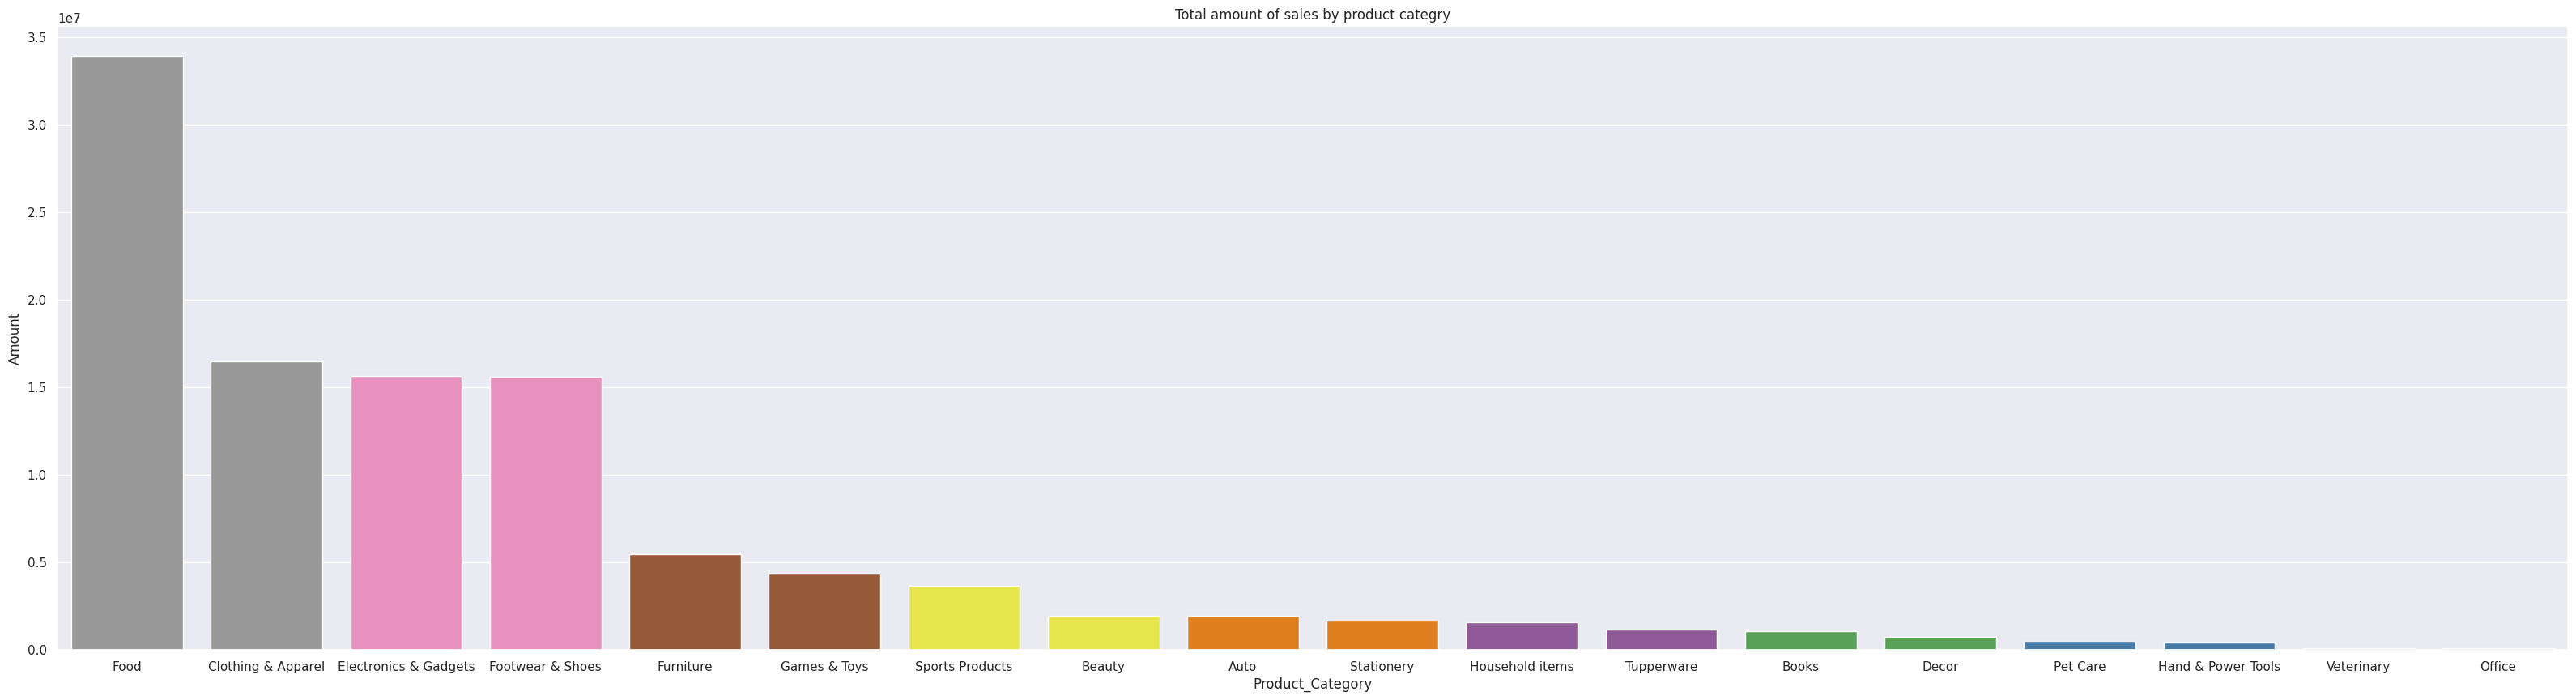

In [76]:
#Total amount of sales according to Product category
sales_pc = data.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Product_Category', y= 'Amount', data = sales_pc, palette = 'Set1_r')
plt.title('Total amount of sales by product categry')

From the above graphs, we can see that the no. of sales by per product category are primarily from Clothing & Apparel, Food, and Electronics & Gadgets respectively.
And from the total amount of sales by product category are primarily from Food, Clothing & Apparel, and Elctronics & Gadgets respectively.

Text(0.5, 1.0, 'Product ID of Top 10 Selling Products')

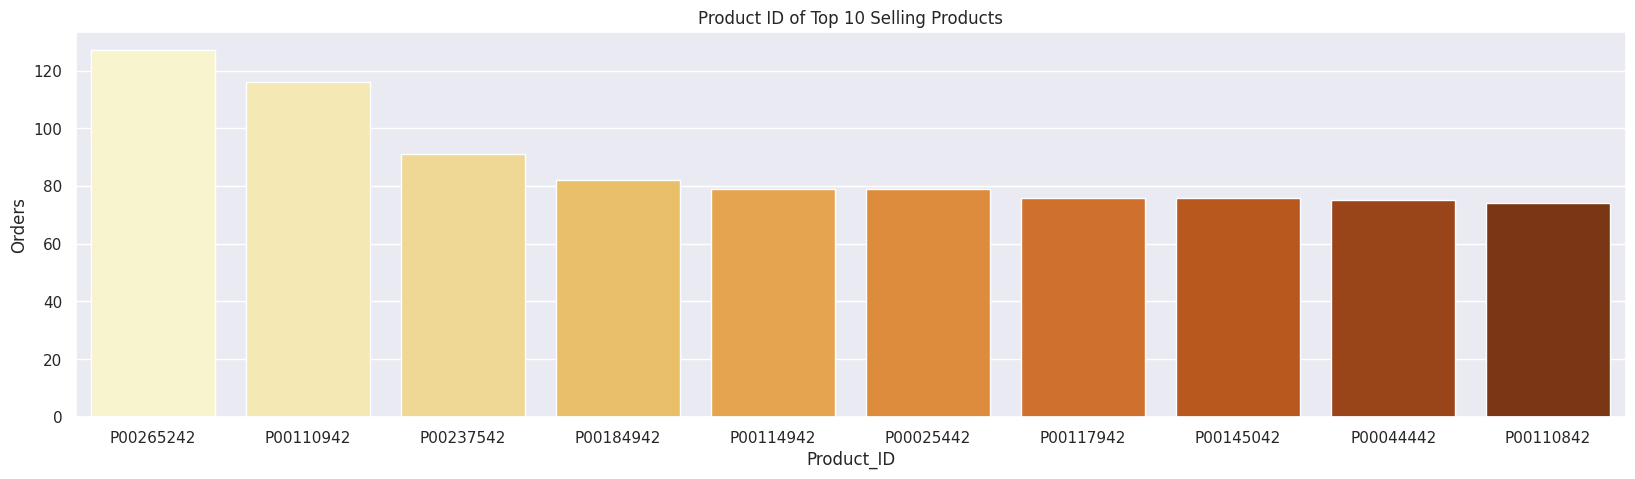

In [79]:
#Fetch product ID of Top 10 selling Products
#1st Method
sales_ID = data.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_ID', y= 'Orders', data = sales_ID, palette = 'YlOrBr')
plt.title('Product ID of Top 10 Selling Products')

Text(0.5, 1.0, 'Product ID of Top 10 Selling Products')

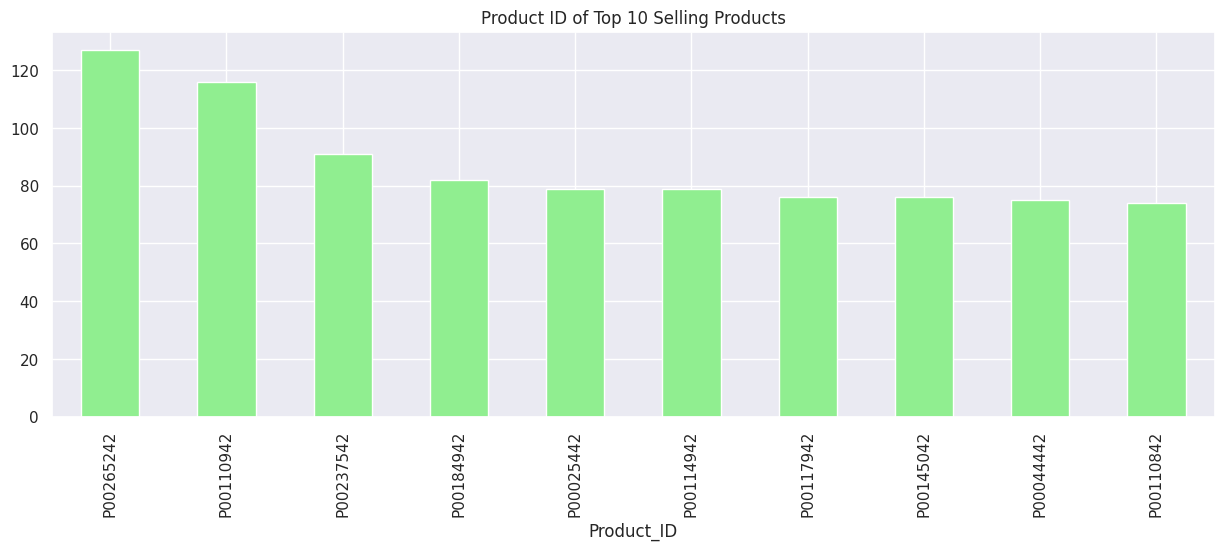

In [81]:
#2nd Method
sns.set(rc={'figure.figsize':(15,5)})
data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind='bar', color='lightgreen')
plt.title('Product ID of Top 10 Selling Products')

**Conclusion**:


**The Married women of the age group 26-35 years from UP, Maharashtra, and Karnataka working in IT, Healthcare, and Aviation sectors are more likely to buy products from Food, Clothing, and Electronics categories. **